In [ ]:
# 공공데이터 포털의 기상청 데이터 Open API 사용해서 데이터 수집

In [1]:
import urllib
# from urllib import request
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
api_key = "R+BEwJ49XVmTutdoCAdNq4m7wjOsdFNhVtlzkxWVeZJPhwQqWbGcD7CNeQPipFzIWAanQVw/rPLsGkfcYvD4AQ=="

url = "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList"

params ={
    'serviceKey' : api_key, 
    'pageNo' : '1', 
    'numOfRows' : '150', 
    'dataType' : 'JSON', 
    'dataCd' : 'ASOS', 
    'dateCd' : 'DAY', 
    'startDt' : '20250101', 
    'endDt' : '20250316', 
    'stnIds' : '108' 
}

response = requests.get(url, params=params)
rescode = response.status_code # 응답 코드 읽기
if(rescode==200): # 200 : 정상응답
    temp_dict = response.json() # json 결과를 읽어서 dict로 변환
else:
    print("Error Code:" + str(rescode))

In [4]:
temp_dict

{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL_SERVICE'},
  'body': {'dataType': 'JSON',
   'items': {'item': [{'stnId': '108',
      'stnNm': '서울',
      'tm': '2025-01-01',
      'avgTa': '2.6',
      'minTa': '-2.5',
      'minTaHrmt': '0441',
      'maxTa': '8.9',
      'maxTaHrmt': '1540',
      'mi10MaxRn': '',
      'mi10MaxRnHrmt': '',
      'hr1MaxRn': '',
      'hr1MaxRnHrmt': '',
      'sumRnDur': '',
      'sumRn': '',
      'maxInsWs': '9.7',
      'maxInsWsWd': '290',
      'maxInsWsHrmt': '1417',
      'maxWs': '5.1',
      'maxWsWd': '250',
      'maxWsHrmt': '1519',
      'avgWs': '2.2',
      'hr24SumRws': '1861',
      'maxWd': '250',
      'avgTd': '-3.6',
      'minRhm': '49',
      'minRhmHrmt': '1543',
      'avgRhm': '64.3',
      'avgPv': '4.8',
      'avgPa': '1011.0',
      'maxPs': '1023.1',
      'maxPsHrmt': '2359',
      'minPs': '1020.0',
      'minPsHrmt': '1446',
      'avgPs': '1021.8',
      'ssDur': '9.6',
      'sumSsHr': '5.6',


In [8]:
# print( temp_dict['response']['body']['items']['item'] )
df_temp = pd.DataFrame(temp_dict['response']['body']['items']['item'])
df_temp.head(2)

,stnId,stnNm,tm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,...,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur
0,108,서울,2025-01-01,2.6,-2.5,0441,8.9,1540,,,...,3.4,6.9,10.0,16.7,18.1,1.3,1.9,,,
1,108,서울,2025-01-02,0.5,-2.9,0804,6.0,1507,,,...,3.4,6.8,9.9,16.6,18.0,1.9,2.6,,,


In [12]:
print( df_temp['avgTa'].dtype )
df_temp['avgTa'] = df_temp['avgTa'].astype(float)

object


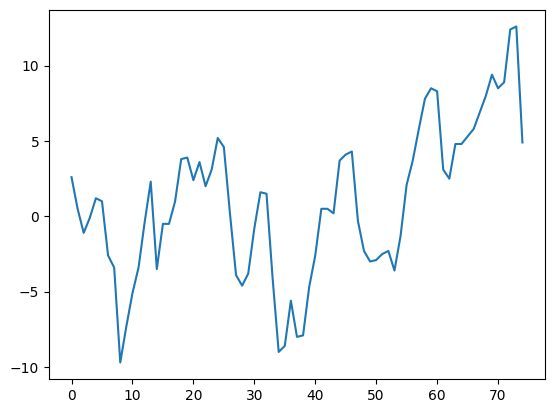

In [13]:
plt.plot(df_temp['avgTa'])
plt.show()